In [11]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import STOPWORDS, WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kimtp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kimtp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kimtp\AppData\Roaming\nltk_data...


True

In [2]:
!pip install xlrd

     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ------------ -------------------------- 30.7/96.5 kB 87.5 kB/s eta 0:00:01
     ------------ -------------------------- 30.7/96.5 kB 87.5 kB/s eta 0:00:01
     ---------------- ---------------------- 41.0/96.5 kB 93.7 kB/s eta 0:00:01
     ---------------- ---------------------- 41.0/96.5 kB 93.7 kB/s eta 0:00:01
     ---------------- ---------------------- 41.0/96.5 kB 93.7 kB/s eta 0:00:01
     ---------------- ---------------------- 41.0/96.5 kB 93.7 kB/s eta 0:00:01
     ------------------------ ------------- 61.4/96.5 kB 102.4 kB/s eta 0:00:01
   

In [3]:
!pip install wordcloud

### 데이터 로드

In [12]:
all_files = glob.glob('C:/Users/kimtp/Desktop/머신러닝/myCa*.xls')
# 별표 * 파일끝에 붙이면 관련된 파일 전부다 로드

In [13]:
all_files

['C:/Users/kimtp/Desktop/머신러닝\\myCabinetExcelData (1).xls',
 'C:/Users/kimtp/Desktop/머신러닝\\myCabinetExcelData (2).xls',
 'C:/Users/kimtp/Desktop/머신러닝\\myCabinetExcelData (3).xls',
 'C:/Users/kimtp/Desktop/머신러닝\\myCabinetExcelData (4).xls',
 'C:/Users/kimtp/Desktop/머신러닝\\myCabinetExcelData (5).xls',
 'C:/Users/kimtp/Desktop/머신러닝\\myCabinetExcelData.xls']

In [14]:
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big Multimodal Data Analysis: Models and Perfo...,"Jeon, Gwanggil",Mary Ann Leibert,2022
1,NaN,2,On the Unstructured Big Data Analytical Method...,"Tarka, Piotr; Jędrych, Elżbieta",Mary Ann Leibert,2020
2,NaN,3,Furthest-Pair-Based Binary Search Tree for Spe...,"Hassanat, A. B. A.",Mary Ann Leibert,2018
3,NaN,4,Using Big Data to Understand the Human Conditi...,unknown,Mary Ann Leibert,2015
4,NaN,5,MonkeyKing: Adaptive Parameter Tuning on Big D...,"Du, Haizhou; Han, Ping; Xiang, Qiao; Huang, Sheng",Mary Ann Leibert,2020
...,...,...,...,...,...,...
95,NaN,96,DiP-SVM : Distribution Preserving Kernel Suppo...,"Singh, D.; Roy, D.; Mohan, C. K.",unknown,2017
96,NaN,97,Toward Efficient and Flexible Metadata Indexin...,"Zhao, D.; Qiao, K.; Zhou, Z.; Li, T.; Lu, Z.; ...",unknown,2017
97,NaN,98,Smart Monitoring Cameras Driven Intelligent Pr...,"Shao, Z.; Cai, J.; Wang, Z.",unknown,2018
98,NaN,99,Availability modelling and assurance for a big...,"Ke, Zuqiang; Park, Nohpill",Inderscience,2019


In [15]:
all_files_data

[    Unnamed: 0   번호                                                 제목  \
 0          NaN    1  Big Multimodal Data Analysis: Models and Perfo...   
 1          NaN    2  On the Unstructured Big Data Analytical Method...   
 2          NaN    3  Furthest-Pair-Based Binary Search Tree for Spe...   
 3          NaN    4  Using Big Data to Understand the Human Conditi...   
 4          NaN    5  MonkeyKing: Adaptive Parameter Tuning on Big D...   
 ..         ...  ...                                                ...   
 95         NaN   96  DiP-SVM : Distribution Preserving Kernel Suppo...   
 96         NaN   97  Toward Efficient and Flexible Metadata Indexin...   
 97         NaN   98  Smart Monitoring Cameras Driven Intelligent Pr...   
 98         NaN   99  Availability modelling and assurance for a big...   
 99         NaN  100  Towards Max-Min Fair Resource Allocation for S...   
 
                                                    저자               출판사   출판일  
 0               

In [16]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

In [10]:
all_files_data_concat
##파일을 하나로 합치기위해서 콘켓을 실행

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big Multimodal Data Analysis: Models and Perfo...,"Jeon, Gwanggil",Mary Ann Leibert,2022
1,NaN,2,On the Unstructured Big Data Analytical Method...,"Tarka, Piotr; Jędrych, Elżbieta",Mary Ann Leibert,2020
2,NaN,3,Furthest-Pair-Based Binary Search Tree for Spe...,"Hassanat, A. B. A.",Mary Ann Leibert,2018
3,NaN,4,Using Big Data to Understand the Human Conditi...,unknown,Mary Ann Leibert,2015
4,NaN,5,MonkeyKing: Adaptive Parameter Tuning on Big D...,"Du, Haizhou; Han, Ping; Xiang, Qiao; Huang, Sheng",Mary Ann Leibert,2020
...,...,...,...,...,...,...
595,NaN,96,Call for Special Issue Papers: Cloud Computing...,"Verdu, Elena; Nieto, Yuri Vanessa; Saleem, Nasir",Mary Ann Leibert,2021
596,NaN,97,Research Dilemmas with Behavioral Big Data,unknown,Mary Ann Leibert,2017
597,NaN,98,Can Big Data Machines Analyze Stock Market Sen...,unknown,Mary Ann Leibert,2014
598,NaN,99,Call for Special Issue Papers: Big Data Analyt...,"El-Latif, Ahmed A. Abd",Mary Ann Leibert,2021


In [18]:
all_files_data_concat.to_csv('C:/Users/kimtp/Desktop/머신러닝/riss_bigdata.csv',
                            encoding='utf-8-sig', index=False)

### 데이터 전처리

In [19]:
all_title = all_files_data_concat['제목']
all_title.head(6)

0    Big Multimodal Data Analysis: Models and Perfo...
1    On the Unstructured Big Data Analytical Method...
2    Furthest-Pair-Based Binary Search Tree for Spe...
3    Using Big Data to Understand the Human Conditi...
4    MonkeyKing: Adaptive Parameter Tuning on Big D...
5    Call for Special Issue Papers: Deep Learning A...
Name: 제목, dtype: object

In [20]:
stopWords = set(stopwords.words('english'))
##불용어 처리

In [21]:
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [22]:
lemma = WordNetLemmatizer()

In [23]:
words = []

for title  in all_title:
    EndWords = re.sub(r'[^a-zA-Z]+', ' ', str(title))
    EndWordsToken = word_tokenize(EndWords.lower())
    EndWordsTokenStop = [w for w in EndWordsToken if w not in stopWords]
    EndWordsTokenStopLemma = [lemma.lemmatize(w) for w in EndWordsTokenStop]
    words.append(EndWordsTokenStopLemma)

In [24]:
print(words)

[['big', 'multimodal', 'data', 'analysis', 'model', 'performance', 'analysis'], ['unstructured', 'big', 'data', 'analytical', 'method', 'firm', 'conceptual', 'model', 'measurement', 'perception'], ['furthest', 'pair', 'based', 'binary', 'search', 'tree', 'speeding', 'big', 'data', 'classification', 'using', 'k', 'nearest', 'neighbor'], ['using', 'big', 'data', 'understand', 'human', 'condition', 'kavli', 'human', 'project'], ['monkeyking', 'adaptive', 'parameter', 'tuning', 'big', 'data', 'platform', 'deep', 'reinforcement', 'learning'], ['call', 'special', 'issue', 'paper', 'deep', 'learning', 'assisted', 'big', 'data', 'analytics', 'biomedical', 'application', 'digital', 'healthcare'], ['mr', 'dp', 'improving', 'performance', 'resource', 'utilization', 'big', 'data', 'application', 'deadline', 'priority'], ['call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering'], ['moth', 'flame', 'optimization', 'bat', 'optimization', 'map',

In [25]:
words2 = list(reduce(lambda x, y: x+y, words))

In [26]:
print(words2)

['big', 'multimodal', 'data', 'analysis', 'model', 'performance', 'analysis', 'unstructured', 'big', 'data', 'analytical', 'method', 'firm', 'conceptual', 'model', 'measurement', 'perception', 'furthest', 'pair', 'based', 'binary', 'search', 'tree', 'speeding', 'big', 'data', 'classification', 'using', 'k', 'nearest', 'neighbor', 'using', 'big', 'data', 'understand', 'human', 'condition', 'kavli', 'human', 'project', 'monkeyking', 'adaptive', 'parameter', 'tuning', 'big', 'data', 'platform', 'deep', 'reinforcement', 'learning', 'call', 'special', 'issue', 'paper', 'deep', 'learning', 'assisted', 'big', 'data', 'analytics', 'biomedical', 'application', 'digital', 'healthcare', 'mr', 'dp', 'improving', 'performance', 'resource', 'utilization', 'big', 'data', 'application', 'deadline', 'priority', 'call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering', 'moth', 'flame', 'optimization', 'bat', 'optimization', 'map', 'reduce', 'frame

### 데이터 분석

In [27]:
count = Counter(words2)

In [28]:
count

Counter({'data': 676,
         'big': 622,
         'analytics': 95,
         'based': 71,
         'analysis': 67,
         'system': 44,
         'approach': 43,
         'issue': 42,
         'using': 40,
         'special': 37,
         'model': 36,
         'learning': 35,
         'call': 32,
         'paper': 31,
         'driven': 31,
         'application': 30,
         'framework': 29,
         'cloud': 25,
         'platform': 23,
         'algorithm': 23,
         'earth': 23,
         'distributed': 22,
         'network': 22,
         'processing': 20,
         'machine': 19,
         'science': 19,
         'computing': 19,
         'management': 19,
         'mining': 19,
         'health': 18,
         'method': 17,
         'perspective': 17,
         'technology': 16,
         'development': 15,
         'research': 15,
         'efficient': 15,
         'review': 15,
         'new': 15,
         'optimization': 14,
         'smart': 14,
         'performance': 13,
 

In [29]:
word_count = dict()

In [30]:
count.most_common(50)

[('data', 676),
 ('big', 622),
 ('analytics', 95),
 ('based', 71),
 ('analysis', 67),
 ('system', 44),
 ('approach', 43),
 ('issue', 42),
 ('using', 40),
 ('special', 37),
 ('model', 36),
 ('learning', 35),
 ('call', 32),
 ('paper', 31),
 ('driven', 31),
 ('application', 30),
 ('framework', 29),
 ('cloud', 25),
 ('platform', 23),
 ('algorithm', 23),
 ('earth', 23),
 ('distributed', 22),
 ('network', 22),
 ('processing', 20),
 ('machine', 19),
 ('science', 19),
 ('computing', 19),
 ('management', 19),
 ('mining', 19),
 ('health', 18),
 ('method', 17),
 ('perspective', 17),
 ('technology', 16),
 ('development', 15),
 ('research', 15),
 ('efficient', 15),
 ('review', 15),
 ('new', 15),
 ('optimization', 14),
 ('smart', 14),
 ('performance', 13),
 ('survey', 13),
 ('business', 13),
 ('sustainable', 13),
 ('internet', 13),
 ('service', 13),
 ('scalable', 13),
 ('editorial', 13),
 ('study', 13),
 ('intelligence', 13)]

In [31]:
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print('%s : %d' % (tag, counts))

data : 676
big : 622
analytics : 95
based : 71
analysis : 67
system : 44
approach : 43
issue : 42
using : 40
special : 37
model : 36
learning : 35
call : 32
paper : 31
driven : 31
application : 30
framework : 29
cloud : 25
platform : 23
algorithm : 23
earth : 23
distributed : 22
network : 22
processing : 20
machine : 19
science : 19
computing : 19
management : 19
mining : 19
health : 18
method : 17
perspective : 17
technology : 16
development : 15
research : 15
efficient : 15
review : 15
new : 15
optimization : 14
smart : 14
performance : 13
survey : 13
business : 13
sustainable : 13
internet : 13
service : 13
scalable : 13
editorial : 13
study : 13
intelligence : 13


In [38]:
sorted_keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_values = sorted(word_count.values(), reverse = True)

In [39]:
sorted_keys

['analytics',
 'analysis',
 'system',
 'approach',
 'issue',
 'using',
 'special',
 'model',
 'learning',
 'call',
 'paper',
 'driven',
 'application',
 'framework',
 'cloud',
 'platform',
 'algorithm',
 'earth',
 'distributed',
 'network',
 'processing',
 'machine',
 'science',
 'computing',
 'management',
 'mining',
 'health',
 'method',
 'perspective',
 'technology',
 'development',
 'research',
 'efficient',
 'review',
 'new',
 'optimization',
 'smart',
 'performance',
 'survey',
 'business',
 'sustainable',
 'internet',
 'service',
 'scalable',
 'editorial',
 'study',
 'intelligence']

In [40]:
sorted_values

[95,
 67,
 44,
 43,
 42,
 40,
 37,
 36,
 35,
 32,
 31,
 31,
 30,
 29,
 25,
 23,
 23,
 23,
 22,
 22,
 20,
 19,
 19,
 19,
 19,
 19,
 18,
 17,
 17,
 16,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13]

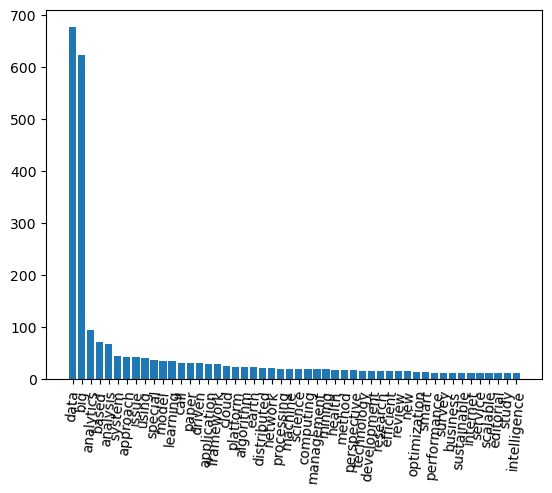

In [36]:
plt.bar(range(len(word_count)), sorted_values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_keys), rotation = 85)
plt.show()

In [37]:
del word_count['big']
del word_count['data']
del word_count['based']
##워드 삭제 삭제를 하게 되면 솔트 부터 다시 실행학습 시켜야됨

In [41]:
sorted_keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_values = sorted(word_count.values(), reverse = True)

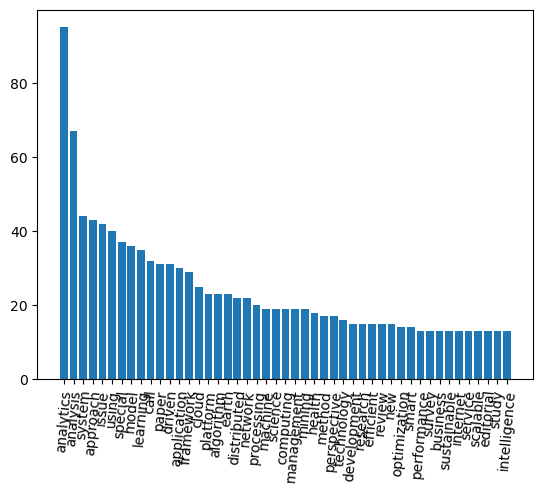

In [42]:
plt.bar(range(len(word_count)), sorted_values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_keys), rotation = 85)
plt.show()

In [43]:
all_files_data_concat.head()

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big Multimodal Data Analysis: Models and Perfo...,"Jeon, Gwanggil",Mary Ann Leibert,2022
1,NaN,2,On the Unstructured Big Data Analytical Method...,"Tarka, Piotr; Jędrych, Elżbieta",Mary Ann Leibert,2020
2,NaN,3,Furthest-Pair-Based Binary Search Tree for Spe...,"Hassanat, A. B. A.",Mary Ann Leibert,2018
3,NaN,4,Using Big Data to Understand the Human Conditi...,unknown,Mary Ann Leibert,2015
4,NaN,5,MonkeyKing: Adaptive Parameter Tuning on Big D...,"Du, Haizhou; Han, Ping; Xiang, Qiao; Huang, Sheng",Mary Ann Leibert,2020


In [44]:
all_files_data_concat['doc_count'] = 0

In [45]:
all_files_data_concat.head(2)

,Unnamed: 0,번호,제목,저자,출판사,출판일,doc_count
0,NaN,1,Big Multimodal Data Analysis: Models and Perfo...,"Jeon, Gwanggil",Mary Ann Leibert,2022,0
1,NaN,2,On the Unstructured Big Data Analytical Method...,"Tarka, Piotr; Jędrych, Elżbieta",Mary Ann Leibert,2020,0


In [46]:
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()

In [47]:
summary_year

,출판일,doc_count
0,2004,1
1,2011,1
2,2012,8
3,2013,16
4,2014,59
5,2015,48
6,2016,71
7,2017,78
8,2018,80
9,2019,54


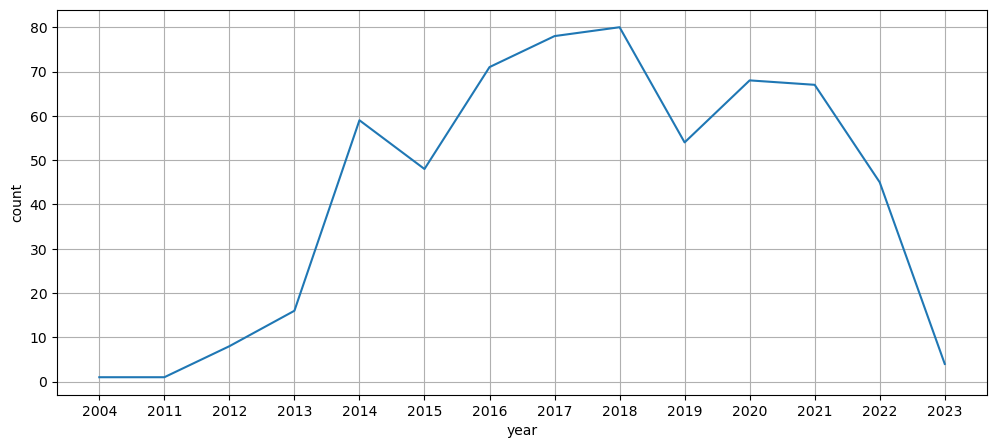

In [48]:
plt.figure(figsize = (12,5))
plt.xlabel("year")
plt.ylabel("count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), summary_year['출판일'])
plt.show()

In [49]:
stopwords = set(STOPWORDS)

In [50]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [51]:
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, 
              width = 800, height = 600)
##워드 클라우드 안에있는 워드로 출력

In [52]:
cloud = wc.generate_from_frequencies(word_count)

<function matplotlib.pyplot.show(close=None, block=None)>

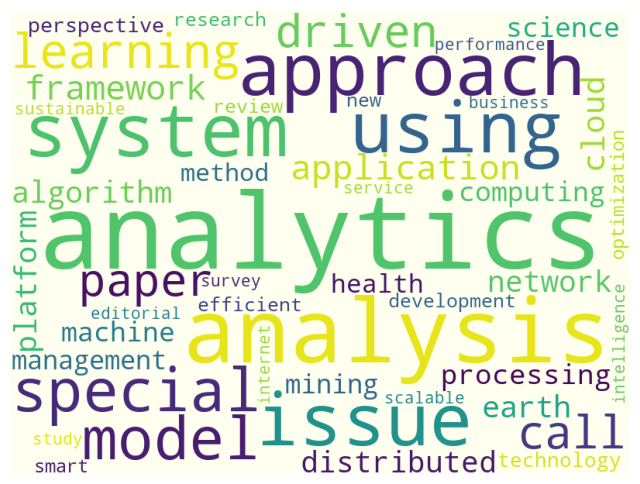

In [53]:
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show

In [57]:
cloud.to_file("C:/Users/kimtp/Desktop/머신러닝/riss_bigdata.jpg")